# March Madness Machine Learning Project

Autor: Dominik Babić

## Reprodukcija rezultata eksperimenata


Navedeni rad kao pristup rješavanja problema predviđanja vjerojatnosti pobjede određene ekipe uzima individualno uvažavanje varijabli koje statistički najviše koreliraju s postotkom pobjede, izračunavanje kvadratne regresijske funkcije nad njima te zatim očekivanje vjerojatni pobjede nad skupom izračunatih regresijskih vrijednosti.

Značajke koje su u radu određene kao najznačajnije su:
- Razlika u **RPI** rangiranju (*Rating Percentage Index*)
- Razlika u **BPI** (*Basketball Power Index*)
- Razlika u ukupnom broju poena (Razlika u ukupnom broju poena)
- Razlika u ukupnom broju ukradenih lopti (Razlika u ukupnom broju ukradenih lopti)
- Razlika u ukupnom broju blokada (Razlika u ukupnom broju blokada)
- Razlika u postotku šuta iz igre (Razlika u postotku šuta iz igre)

To su značajke koje su dostupne prije samih odigranih utakmica, tj. predstavljaju statistike timova kroz njihovu regularnu sezonu, što ih čini idealnim za korištenje pri predviđanju pobjednika. 

Naime, podaci o samoj utakmici nam neće pomoći jer su oni dostupni tek nakon što je utakmica odigrana, a cilj nam je predvidjeti pobjednika prije samog početka utakmice.

Ovo znanje iskoristit ćemo pri replikaciji eksperimenata iz rada.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

Prvo ćemo izvući navedene značajke iz našeg skupa podataka te prikazati njihovu korelaciju s postotkom pobjede.
U tu svrhu iskoristit ćemo `Tournament Team Data (Including 2023).csv` i `Game Data.csv` datoteke za treniranje te `2023 Game Data.csv` za testiranje modela s obzirom da želimo izvesti predviđanja za timove koji su se kvalificirali u sezoni 2022./2023.

BPI vrijednosti za ekipe kroz godine dohvaćene su s ESPN-ovog API-ja te su spremljene u `bpi_data.csv` datoteku.

In [ ]:
tournament_team_data = pd.read_csv('march-madness-data/Tournament Team Data (Including 2023).csv')
game_data = pd.read_csv('march-madness-data/Game Data.csv')
game_data_2023 = pd.read_csv('march-madness-data/2023 Game Data.csv')
bpi_data = pd.read_csv('march-madness-data/bpi_data.csv')

# Nekonzistentnost podataka skupljenih za BPI index s nazivima timova u ostalim skupovima
# bpi_data['TEAM'] = bpi_data['TEAM'].replace(r'\b(\w+\s*St)\b', r'\1.', regex=True)
# bpi_data['TEAM'] = bpi_data['TEAM'].str.replace('State', 'St.')
# bpi_data['TEAM'] = bpi_data['TEAM'].str.replace(r'\bMiami\b', 'Miami FL', regex=True)
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Fullerton', 'Cal St. Fullerton')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Jacksonville', 'Jacksonville St.')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('St Bonaventure', 'St. Bonaventure')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Texas A&M-CC', 'Texas A&M CC')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Santa Barbara', 'UC Santa Barbara')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Abilene Chrstn', 'Abilene Christian')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('E Washington', 'Eastern Washington')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Mount St. Marys', "Mount St. Mary's")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Virginia ', "Virginia")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("St John's", "St. John's")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Kentucky", "Northern Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Fair Dickinson", "Fairleigh Dickinson")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Gardner-Webb", "Gardner Webb")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Gardner-Webb", "Gardner Webb")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Dakota St.", "North Dakota St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC Central", "North Carolina Central")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC St.", "North Carolina St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Prairie View", "Prairie View A&M")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Charleston", "College of Charleston")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("SF Austin", "Stephen F. Austin")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Long Island", "LIU Brooklyn")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("MTSU", "Middle Tennessee")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("ETSU", "East Tennessee St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("FGCU", "Florida Gulf Coast")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Pitt", "Pittsburgh")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Little Rock", "Arkansas Little Rock")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Hawai'i", "Hawaii")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Bakersfield", "Cal St. Bakersfield")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("UAlbany", "Albany")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Coastal Car", "Coastal Carolina")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("UMass", "Massachusetts")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("G Washington", "George Washington")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("W Michigan", "Western Michigan")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Louisiana", "Louisiana Lafayette")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("E Kentucky", "Eastern Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N'Western St.", "Northwestern St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC A&T", "North Carolina A&T")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Western KY", "Western Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Detroit Mercy", "Detroit")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Miss Valley St.", "Mississippi Valley St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Colorado", "Northern Colorado")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Boston U", "Boston University")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Sam Houston", "Sam Houston St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("AR-Pine Bluff", "Arkansas Pine Bluff")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("CSU Northridge", "Cal St. Northridge")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("FAU", "Florida Atlantic")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("SE Missouri", "Southeast Missouri St.")
# bpi_data.to_csv('march-madness-data/bpi_data.csv', index=False)

tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Virginia ", "Virginia")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Mississippi", "Mississippi St.")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")
game_data_2023['TEAM'] = game_data_2023['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")

tournament_team_data = tournament_team_data.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %', 'BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS']]
tournament_team_data = tournament_team_data.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')
game_data_2023 = game_data_2023.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')

tournament_team_data.info()
tournament_team_data.describe()

In [ ]:
game_data_2023 = game_data_2023.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %', 'BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS','BPI']]

game_data_2023.info()
game_data_2023.describe()

Sada ćemo pokušati izvesti navedene značajke iz našeg skupa podataka te prikazati njihovu korelaciju s postotkom pobjede. Možemo primjetiti da neke od navedenih značajki nisu dostupne u skupu podataka, a nije ih moguće izračunati iz dostupnih podataka, one će biti zamijenjene sličnim značajkama koje su dostupne u skupu podataka (nisu dostupni BPI, RPI, ukupni blokovi, ukupni poeni i broj ukradenih lopti).

Prvi korak je određivanje pobjednika i gubitnika utakmica čije podatke imamo u skupu podataka `Game Data.csv`. U tom skupu podataka svaka dva retka prikazuju podatke o jednoj utakmici, tako da ćemo reducirati broj podataka na pola.

In [ ]:
new_columns = ['YEAR', 'WINNING TEAM', 'LOSING TEAM', 'W TEAM LOC']

new_game_data_rows = []

for i in range(0, len(game_data), 2):
    game1_row = game_data.iloc[i]
    game2_row = game_data.iloc[i + 1]

    winning_team_stats = game1_row if game1_row['TEAM 1 OUTCOME'] == 'W' else game2_row
    losing_team_stats = game2_row if game1_row['TEAM 1 OUTCOME'] == 'W' else game1_row

    new_row = [game1_row['YEAR'], winning_team_stats['TEAM 1'], losing_team_stats['TEAM 1'], winning_team_stats['TEAM 1 LOCATION']]
    new_game_data_rows.append(new_row)

game_data = pd.DataFrame(new_game_data_rows, columns=new_columns)

In [ ]:
game_data.info()

Sada ćemo u ovu tablicu nadodati podatke pobjednika i gubitnika za istu godinu iz tablice `Tournament Team Data (Including 2023).csv` te izračunati razliku u svim značajkama koje su nam dostupne. Osim toga, izračunat ćemo podatke koji nam nedostaju, a to je RPI index. RPI index je indeks koji se računa na temelju pobjeda i poraza ekipe, kao i pobjeda i poraza protivnika ekipe. Ovaj indeks je dostupan za svaku ekipu u tablici `Tournament Team Data (Including 2023).csv` te ćemo ga iskoristiti za izračun RPI indeksa za svaku utakmicu u tablici `Game Data.csv`.

In [ ]:
merged_data_winning = pd.merge(game_data, tournament_team_data, left_on=['YEAR', 'WINNING TEAM'], right_on=['YEAR', 'TEAM'], how='outer')
merged_data_winning = merged_data_winning.drop(["TEAM"], axis=1)
merged_data_winning = merged_data_winning.rename(columns=lambda x: 'WINNER TEAM ' + x if x not in ['YEAR', 'LOSING TEAM', 'WINNING TEAM', 'W TEAM LOC'] else x)

merged_data_losing = pd.merge(game_data, tournament_team_data, left_on=['YEAR', 'LOSING TEAM'], right_on=['YEAR', 'TEAM'], how='outer')
merged_data_losing = merged_data_losing.drop(["TEAM"], axis=1)
merged_data_losing = merged_data_losing.rename(columns=lambda x: 'LOSER TEAM ' + x if x not in ['YEAR', 'WINNING TEAM', 'LOSING TEAM', 'W TEAM LOC'] else x)

merged_data = pd.merge(merged_data_winning, merged_data_losing, on=['YEAR', 'WINNING TEAM', 'LOSING TEAM', 'W TEAM LOC'], how='outer')

# Filter out non-numeric columns
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns

for col in numeric_cols.values:
    if merged_data[col].isnull().values.any():
        merged_data[col].fillna(merged_data[col].interpolate(), inplace=True)

merged_data.info()

Sada ćemo isti postupak provesti nad tablicom `2023 Game Data.csv` kako bismo dobili podatke za testiranje prediktivnih sposobnosti modela. Te podatke ćemo zatim spojiti s ostalim podacima, kako bi za svaku utakmicu mogli izračunati RPI indeks.

In [ ]:
cols = merged_data.columns
    
new_game_data_rows = []

for i in range(0, len(game_data_2023), 2):
    team1_row = game_data_2023.iloc[i]
    team2_row = game_data_2023.iloc[i + 1]

    if team1_row['WIN %'] >= team2_row['WIN %']:
        new_row = [team1_row['YEAR'], team1_row['TEAM'], team2_row['TEAM'], 'N', team1_row['SEED'], team1_row['WIN %'], team1_row['BLOCK %'], team1_row['EFG %'], team1_row['BARTHAG'], team1_row['DEFENSIVE REBOUND %'], team1_row['POINTS PER POSSESSION OFFENSE'], team2_row['ELITE SOS'], team1_row['BPI'], team2_row['SEED'], team2_row['WIN %'], team2_row['BLOCK %'], team2_row['EFG %'], team2_row['BARTHAG'], team2_row['DEFENSIVE REBOUND %'], team2_row['POINTS PER POSSESSION OFFENSE'], team2_row['ELITE SOS'], team2_row['BPI']]
    else:
        new_row = [team2_row['YEAR'], team2_row['TEAM'], team1_row['TEAM'], 'N', team2_row['SEED'], team2_row['WIN %'], team2_row['BLOCK %'], team2_row['EFG %'], team2_row['BARTHAG'], team2_row['DEFENSIVE REBOUND %'], team2_row['POINTS PER POSSESSION OFFENSE'], team2_row['ELITE SOS'], team2_row['BPI'], team1_row['SEED'], team1_row['WIN %'], team1_row['BLOCK %'], team1_row['EFG %'], team1_row['BARTHAG'], team1_row['DEFENSIVE REBOUND %'], team1_row['POINTS PER POSSESSION OFFENSE'], team1_row['ELITE SOS'], team1_row['BPI']]
    new_game_data_rows.append(new_row)

game_data_2023_new = pd.DataFrame(new_game_data_rows, columns=cols)
merged_data = pd.concat([merged_data, game_data_2023_new])
merged_data.info()

RPI indeks je indeks koji se računa na temelju pobjeda i poraza ekipe, kao i pobjeda i poraza protivnika ekipe. Opća formula za izračun RPI indeksa je:
$$
RPI = 0.25 * WP + 0.5 * OWP + 0.25 * OOWP
$$
gdje:
- WP predstavlja postotak pobjeda ekipe
- OWP predstavlja prosječni postotak pobjeda protivnika ekipe
- OOWP predstavlja prosječni postotak pobjeda protivnika protivnika ekipe

Protivnički postotak pobjeda i postotak pobjeda protivnika tih protivnika čine snagu rasporeda (SOS). Stoga, SOS čini 75% RPI izračuna.
Znajući to, RPI indeks možemo izračunati na sljedeći način:
$$
RPI = 0.25 * WP + 0.75 * SOS
$$

U sljedećim odlomcima koda, izveo sam oba pristupa računanja RPI indeksa, a u svrhu ovog rada, koristit ćemo drugi pristup.

In [ ]:
# Calculate OWP
owp_data = merged_data.groupby(['YEAR', 'WINNING TEAM']).agg({'LOSER TEAM WIN %': 'mean'}).reset_index()
owp_data = owp_data.rename(columns={'LOSER TEAM WIN %': 'OWP', 'WINNING TEAM': 'TEAM'})

# Calculate OOWP
oowp_data = owp_data.groupby(['YEAR', 'TEAM']).agg({'OWP': 'mean'}).reset_index()
oowp_data = oowp_data.rename(columns={'OWP': 'OOWP'})

# Merge OWP and OOWP data with merge_data
merged_data = pd.merge(owp_data, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'WINNING TEAM'], how='left', suffixes=('', '_winning'))
merged_data = pd.merge(oowp_data, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'WINNING TEAM'], how='left', suffixes=('', '_winning'))

# Calculate RPI index for WINNING TEAM
merged_data['RPI WINNING TEAM'] = (0.25 * merged_data['WINNER TEAM WIN %']) + (0.50 * merged_data['OWP']) + (0.25 * merged_data['OOWP'])
merged_data = merged_data.drop(['OWP', 'OOWP', 'TEAM_winning'], axis=1)

merged_data.info()

# Repeat the process for LOSING TEAM
owp_data_losing = merged_data.groupby(['YEAR', 'LOSING TEAM']).agg({'WINNER TEAM WIN %': 'mean'}).reset_index()
owp_data_losing = owp_data_losing.rename(columns={'WINNER TEAM WIN %': 'OWP', 'LOSING TEAM': 'TEAM'})

oowp_data_losing = owp_data_losing.groupby(['YEAR', 'TEAM']).agg({'OWP': 'mean'}).reset_index()
oowp_data_losing = oowp_data_losing.rename(columns={'OWP': 'OOWP'})

# Merge OWP and OOWP data with merge_data for LOSING TEAM
# merged_data = pd.merge(owp_data_losing, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'LOSING TEAM'], how='left', suffixes=('', '_merged'))
# merged_data = pd.merge(oowp_data_losing, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'LOSING TEAM'], how='left', suffixes=('', '_merged_1'))

# Calculate RPI index for LOSING TEAM
# merged_data['RPI LOSING TEAM'] = (0.25 * merged_data['LOSER TEAM WIN %']) + (0.50 * merged_data['OWP']) + (0.25 * merged_data['OOWP'])
# merged_data = merged_data.drop(['OWP', 'OOWP', 'TEAM_merged_1'], axis=1)

# merged_data.info()
# merged_data.describe()


In [ ]:
merged_data['RPI WINNING TEAM'] = 0.25 * merged_data['WINNER TEAM WIN %'] + 0.75 * merged_data['WINNER TEAM ELITE SOS']
merged_data['RPI LOSING TEAM'] = 0.25 * merged_data['LOSER TEAM WIN %'] + 0.75 * merged_data['LOSER TEAM ELITE SOS']

Raspodijelit ćemo razrađene podatke sada na one za treniranje modela (do 2023. godine) i na one za testiranje modela (podaci iz 2023. godine).

In [ ]:
merged_data['EFG % DIFF'] = merged_data['WINNER TEAM EFG %'] - merged_data['LOSER TEAM EFG %']
merged_data['BLOCK % DIFF'] = merged_data['WINNER TEAM BLOCK %'] - merged_data['LOSER TEAM BLOCK %']
merged_data['BPI DIFF'] = merged_data['WINNER TEAM BPI'] - merged_data['LOSER TEAM BPI']
merged_data['RPI DIFF'] = merged_data['RPI WINNING TEAM'] - merged_data['RPI LOSING TEAM']
merged_data['PPPO DIFF'] = merged_data['WINNER TEAM POINTS PER POSSESSION OFFENSE'] - merged_data['LOSER TEAM POINTS PER POSSESSION OFFENSE']
merged_data['DEFENSIVE REBOUND % DIFF'] = merged_data['WINNER TEAM DEFENSIVE REBOUND %'] - merged_data['LOSER TEAM DEFENSIVE REBOUND %']
merged_data['WIN % DIFF'] = merged_data['WINNER TEAM WIN %'] - merged_data['LOSER TEAM WIN %']

train_data = merged_data[merged_data['YEAR'] != 2023]
test_data = merged_data[merged_data['YEAR'] == 2023]

Prikazat ćemo podatke prije nego li ih provedemo kroz model.

In [ ]:
for year in [2008]:
    year_data = merged_data[merged_data['YEAR'] == year]
    fig, axs = plt.subplots(2, 3, figsize=(50, 20))
    year_data.plot(kind='scatter', x='WIN % DIFF', y='BPI DIFF', ax=axs[0, 0], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='RPI DIFF', ax=axs[0, 1], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='EFG % DIFF', ax=axs[0, 2], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='BLOCK % DIFF', ax=axs[1, 0], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='PPPO DIFF', ax=axs[1, 1], grid=True)
    year_data.plot(kind='scatter', x='WIN % DIFF', y='DEFENSIVE REBOUND % DIFF', ax=axs[1, 2], grid=True)

Sada kada imamo sve podatke, možemo ih na prikazanom grafu uočiti kako se ponašaju. Možemo primjetiti da su podaci prilično razbacani, ali prate neku određenu korelaciju s **razlikom u postotku pobjeda**.

# Primjedbama na dosadašnji rad

Ono što se može uočiti jest da stav koji je korišten u ovom radu jest da je **razlika u postotku pobjeda** značajka s kojom bi ostale značajke trebale korelirati i koja predviđa pobjednika. U samom radu slabo je razrađeno što su oni zapravo koristili kao izlaz pri treniranju, kako su obradili podatke te kako su evaluirali izlaze modela kod treniranja.
Naime, može se primjetiti kako je ovo primjer zadatka za model logističke regresije gdje izlaz modela definira pobjedu odnosno poraz, no u radu je korišten ansamblovski model linearnih regresija, što je prilično neobično s obzirom na to da je izlaz modela (poraz/pobjeda) binarna varijabla. Jedan od glavnih nedostataka linearnih modela je taj što njihov izlaz ne mora biti u intervalu [0, 1], što je slučaj kod logističke regresije. Stoga, može se primjetiti kako je korištenje ansamblovskog modela linearnih regresija prilično neobično, a u radu nije objašnjeno zašto je baš taj model korišten. Osim toga, linearne regresije su prilično osjetljive na outliers, što je još jedan razlog zašto je korištenje ansamblovskog modela linearnih regresija stvarno čudno.

Sada ćemo pristupiti problem predviđanja pobjednika tako da ćemo za izlaz modela koristiti podatak pobjede odnosno poraza, a ne postotak pobjeda. Primjeniti ćemo ansamblovski model linearnih regresija te ćemo evaluirati njegove izlaze, a prilikom poboljšanja rezultata, pokušat ćemo koristiti i druge modele (logističku regresiju ili općeniti model linearne regresije s aktivacijskim funkcijama).

In [39]:
tournament_team_data = pd.read_csv('march-madness-data/Tournament Team Data (Including 2023).csv')
game_data = pd.read_csv('march-madness-data/Game Data.csv')
game_data_2023 = pd.read_csv('march-madness-data/2023 Game Data.csv')
bpi_data = pd.read_csv('march-madness-data/bpi_data.csv')

tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Virginia ", "Virginia")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Mississippi", "Mississippi St.")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")
game_data_2023['TEAM'] = game_data_2023['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")

tournament_team_data = tournament_team_data.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %','BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS']]
tournament_team_data = tournament_team_data.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')
game_data_2023 = game_data_2023.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')
game_data_2023 = game_data_2023.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %', 'BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS','BPI']]

tournament_team_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           1011 non-null   int64  
 1   SEED                           1011 non-null   int64  
 2   TEAM                           1011 non-null   object 
 3   WIN %                          1011 non-null   float64
 4   BLOCK %                        1011 non-null   float64
 5   EFG %                          1011 non-null   float64
 6   BARTHAG                        1011 non-null   float64
 7   DEFENSIVE REBOUND %            1011 non-null   float64
 8   POINTS PER POSSESSION OFFENSE  1011 non-null   float64
 9   ELITE SOS                      1011 non-null   float64
 10  BPI                            1011 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 87.0+ KB


Sada ćemo u koraku obrađivanja podataka uvesti binarnu varijabli `TEAM 1 WIN` koja će označavati pobjedu odnosno poraz ekipe. Ova varijabla će biti izlaz modela, a ne postotak pobjeda.

In [40]:
new_columns = ['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 WIN', 'TEAM 1 LOCATION']
game_data['TEAM 1 WIN'] = game_data['TEAM 1 OUTCOME'].map({'W': 1, 'L': 0})
game_data = game_data.loc[:, new_columns]
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160226 entries, 0 to 160225
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   YEAR             160226 non-null  int64 
 1   TEAM 1           160226 non-null  object
 2   TEAM 2           160226 non-null  object
 3   TEAM 1 WIN       160226 non-null  int64 
 4   TEAM 1 LOCATION  160226 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.1+ MB


In [41]:
merged_data_team1 = pd.merge(game_data, tournament_team_data, left_on=['YEAR', 'TEAM 1'], right_on=['YEAR', 'TEAM'], how='outer')
merged_data_team1 = merged_data_team1.drop(["TEAM"], axis=1)
merged_data_team1 = merged_data_team1.rename(columns=lambda x: 'TEAM 1 ' + x if x not in ['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 LOCATION', 'TEAM 1 WIN'] else x)

merged_data_team2 = pd.merge(game_data, tournament_team_data, left_on=['YEAR', 'TEAM 2'], right_on=['YEAR', 'TEAM'], how='outer')
merged_data_team2 = merged_data_team2.drop(["TEAM"], axis=1)
merged_data_team2 = merged_data_team2.rename(columns=lambda x: 'TEAM 2 ' + x if x not in ['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 LOCATION', 'TEAM 1 WIN'] else x)

merged_data = pd.merge(merged_data_team1, merged_data_team2, on=['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 LOCATION', 'TEAM 1 WIN'], how='outer')

# Filter out non-numeric columns
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns

for col in numeric_cols.values:
    if merged_data[col].isnull().values.any():
        merged_data[col].fillna(merged_data[col].interpolate(), inplace=True)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168477 entries, 0 to 168476
Data columns (total 23 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   YEAR                                  168477 non-null  int64  
 1   TEAM 1                                163850 non-null  object 
 2   TEAM 2                                163850 non-null  object 
 3   TEAM 1 WIN                            168477 non-null  float64
 4   TEAM 1 LOCATION                       163850 non-null  object 
 5   TEAM 1 SEED                           168362 non-null  float64
 6   TEAM 1 WIN %                          168362 non-null  float64
 7   TEAM 1 BLOCK %                        168362 non-null  float64
 8   TEAM 1 EFG %                          168362 non-null  float64
 9   TEAM 1 BARTHAG                        168362 non-null  float64
 10  TEAM 1 DEFENSIVE REBOUND %            168362 non-null  float64
 11  

Sada ćemo pripremiti podatke za testiranje modela. Njih ćemo ubaciti među podatke za treniranje radi lakšeg računanja RPI nad cijelim skupom umjesto zasebno za svaki posebni skup.

In [42]:
cols = merged_data.columns
new_game_data_rows = []

for i in range(0, len(game_data_2023), 2):
    team1_row = game_data_2023.iloc[i]
    team2_row = game_data_2023.iloc[i + 1]
    
    # TEAM 1 WIN cu u ovim podacima postaviti na 0, ali kasnije ću ih opet izdvojiti od onih za treniranje pa nam to 
    new_row = [team1_row['YEAR'], team1_row['TEAM'], team2_row['TEAM'], 0, 'N', team1_row['SEED'],
               team1_row['WIN %'], team1_row['BLOCK %'], team1_row['EFG %'], team1_row['BARTHAG'], 
               team1_row['DEFENSIVE REBOUND %'], team1_row['POINTS PER POSSESSION OFFENSE'], 
               team2_row['ELITE SOS'], team1_row['BPI'], team2_row['SEED'], team2_row['WIN %'], 
               team2_row['BLOCK %'], team2_row['EFG %'], team2_row['BARTHAG'], team2_row['DEFENSIVE REBOUND %'], 
               team2_row['POINTS PER POSSESSION OFFENSE'], team2_row['ELITE SOS'], team2_row['BPI']]


test_game_data = pd.DataFrame(new_game_data_rows, columns=cols)
merged_data = pd.concat([merged_data, test_game_data])
merged_data = merged_data.dropna()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163735 entries, 115 to 163849
Data columns (total 23 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   YEAR                                  163735 non-null  object 
 1   TEAM 1                                163735 non-null  object 
 2   TEAM 2                                163735 non-null  object 
 3   TEAM 1 WIN                            163735 non-null  float64
 4   TEAM 1 LOCATION                       163735 non-null  object 
 5   TEAM 1 SEED                           163735 non-null  float64
 6   TEAM 1 WIN %                          163735 non-null  float64
 7   TEAM 1 BLOCK %                        163735 non-null  float64
 8   TEAM 1 EFG %                          163735 non-null  float64
 9   TEAM 1 BARTHAG                        163735 non-null  float64
 10  TEAM 1 DEFENSIVE REBOUND %            163735 non-null  float64
 11  TEA

/tmp/ipykernel_76614/1288881915.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_data = pd.concat([merged_data, test_game_data])


Izračunat ćemo ponovno RPI indeks za sve utakmice. 

In [43]:
merged_data['RPI TEAM 1'] = 0.25 * merged_data['TEAM 1 WIN %'] + 0.75 * merged_data['TEAM 1 ELITE SOS']
merged_data['RPI TEAM 2'] = 0.25 * merged_data['TEAM 2 WIN %'] + 0.75 * merged_data['TEAM 2 ELITE SOS']

In [44]:
merged_data['EFG % DIFF'] = merged_data['TEAM 1 EFG %'] - merged_data['TEAM 2 EFG %']
merged_data['BLOCK % DIFF'] = merged_data['TEAM 1 BLOCK %'] - merged_data['TEAM 2 BLOCK %']
merged_data['BPI DIFF'] = merged_data['TEAM 1 BPI'] - merged_data['TEAM 2 BPI']
merged_data['RPI DIFF'] = merged_data['RPI TEAM 1'] - merged_data['RPI TEAM 2']
merged_data['PPPO DIFF'] = merged_data['TEAM 1 POINTS PER POSSESSION OFFENSE'] - merged_data['TEAM 2 POINTS PER POSSESSION OFFENSE']
merged_data['DEFENSIVE REBOUND % DIFF'] = merged_data['TEAM 1 DEFENSIVE REBOUND %'] - merged_data['TEAM 2 DEFENSIVE REBOUND %']
merged_data['WIN % DIFF'] = merged_data['TEAM 1 WIN %'] - merged_data['TEAM 2 WIN %']

train_data = merged_data[merged_data['YEAR'] != 2023]
test_data = merged_data[merged_data['YEAR'] == 2023]

Ovako obrađene podatke možemo iskoristiti za treniranje modela. Podatke smo podijelili na one za treniranje i one za testiranje.

In [45]:
polys = []
models =[]

for v in ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF', 'WIN % DIFF']:
    poly = PolynomialFeatures(degree=2)
    X_train = train_data[v].values.reshape(-1, 1)
    X_train_poly = poly.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_train_poly, train_data['TEAM 1 WIN'])

    polys.append(poly)
    models.append(model)

/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dominik/.conda/envs/lab3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseD

In [46]:
def algorithm(test_data, models, polys, features):
    prob = []

    for model, poly, feature in zip(models, polys, features):
        X_test = test_data[feature].values.reshape(-1, 1)
        X_test_poly = poly.transform(X_test)
        prob.append(model.predict(X_test_poly)[0])

    return np.mean(prob)

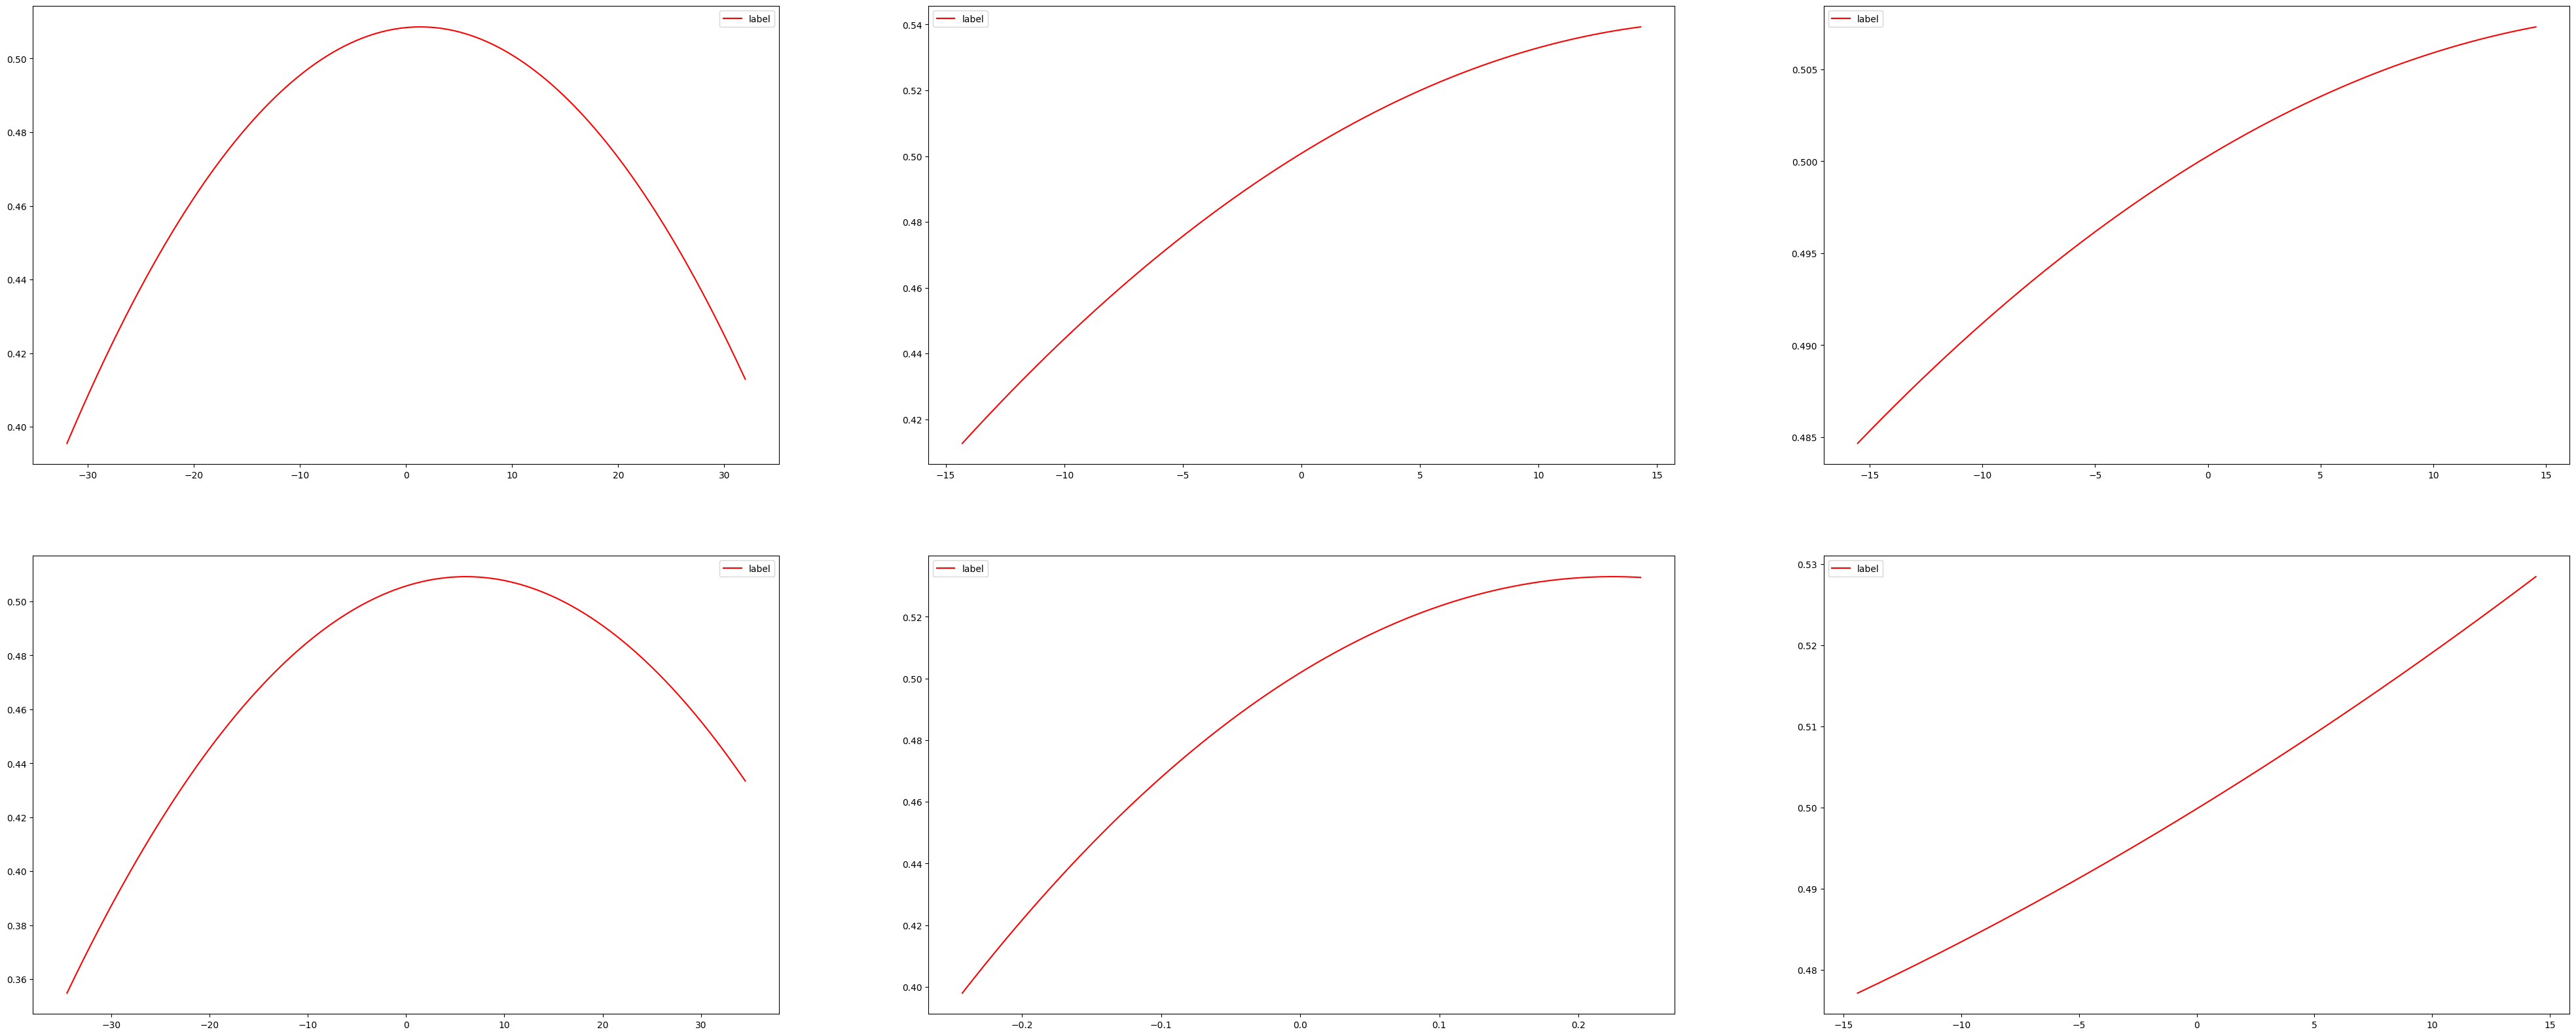

In [59]:
x_test_from_train = train_data.copy()

f, ax = plt.subplots(2, 3, figsize=(50, 20))
for i, (model, poly, feature) in enumerate(zip(models, polys, ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF'])):
    x = np.linspace(x_test_from_train[feature].min(), x_test_from_train[feature].max(), 1000)
    x_poly = poly.transform(x.reshape(-1, 1))
    ax[i//3, i%3].plot(x, model.predict(x_poly), c='r', label='label')
    ax[i//3, i%3].legend(loc='best')